In [41]:
import matplotlib
from plantcv import plantcv as pcv
from plantcv.utils import tabulate_bayes_classes
from plantcv.parallel import WorkflowInputs
import numpy as np

In [42]:
args = WorkflowInputs(
    images=[r"C:\Plant_analysis\notebooks\datasets\side_view\15.jpg"],
    names="image1",
    result="side07.json",
    debug="plot"
)
pcv.params.debug = args.debug
pcv.params.dpi = 100
pcv.params.text_size = 2
pcv.params.text_thickness = 10

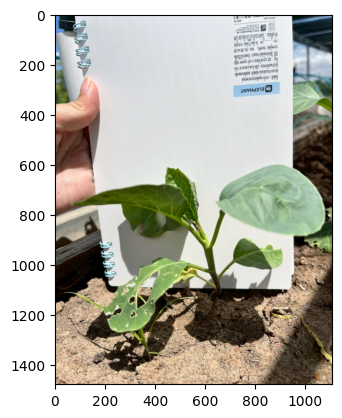

In [43]:
img, path, filename = pcv.readimage(filename=args.image1)

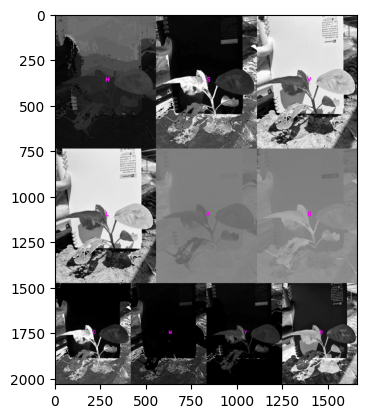

In [44]:
colorspaces = pcv.visualize.colorspaces(rgb_img=img, original_img=False)

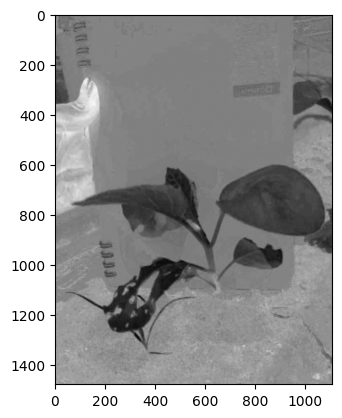

In [45]:
a = pcv.rgb2gray_lab(rgb_img=img, channel='a')

In [46]:
hist = pcv.visualize.histogram(img=a)

alt.Chart(...)

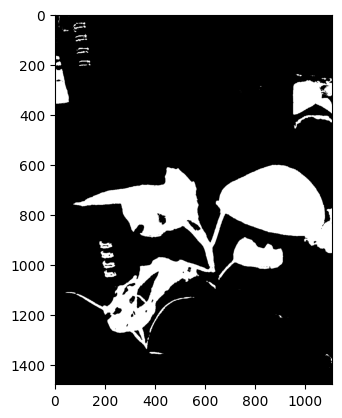

In [62]:
thresh = pcv.threshold.gaussian(gray_img=a, ksize=9000, offset=10,
                                object_type='dark')

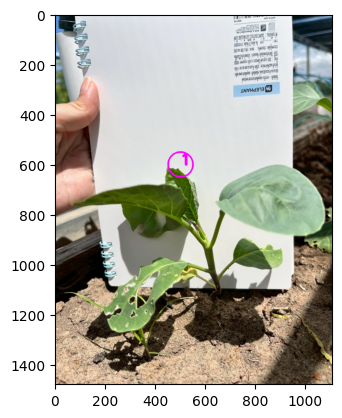

In [48]:
roi = pcv.roi.circle(img=img, x=500, y=600, r=50)

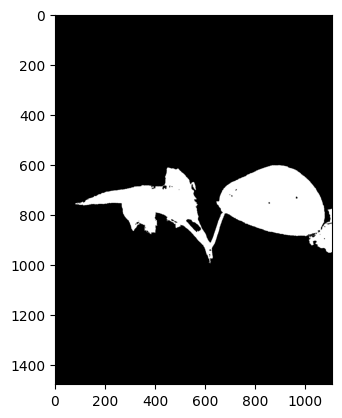

In [49]:
kept_mask = pcv.roi.filter(mask=thresh, roi=roi, roi_type="partial")

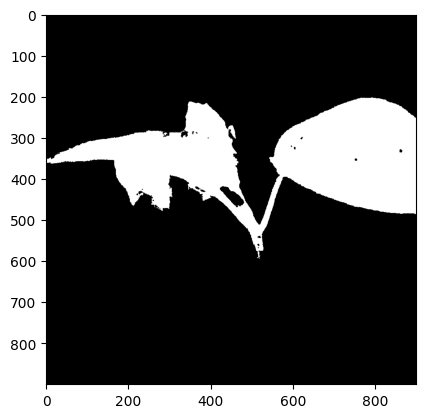

In [50]:
cropped_mask = kept_mask[400:1300, 100:1000] #[y:y2, x1:x2]
cropped_img = img[400:1300, 100:1000]
pcv.plot_image(cropped_mask)

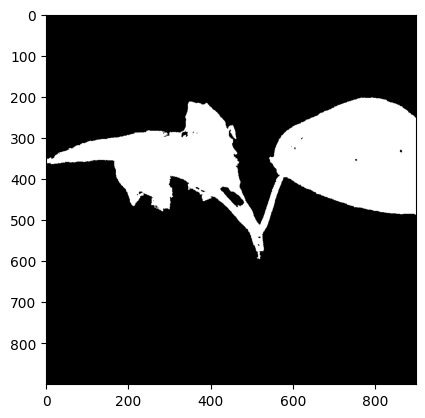

In [51]:
mask_dilated = pcv.dilate(gray_img=cropped_mask, ksize=2, i=1)

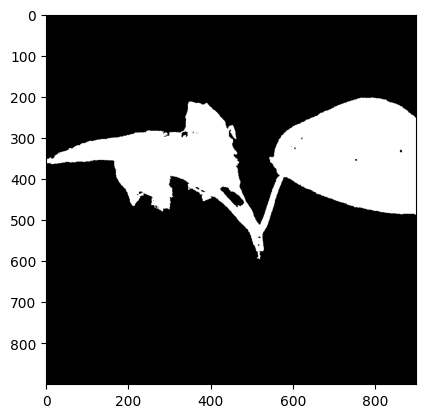

In [52]:
mask_fill = pcv.fill(bin_img=mask_dilated, size=30)


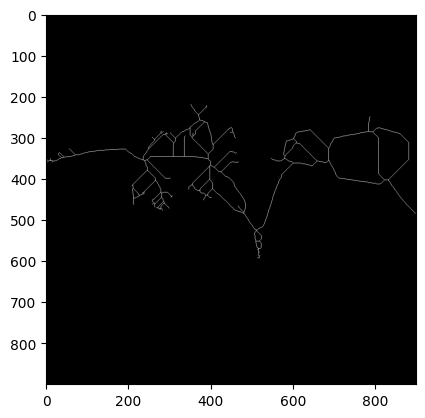

In [53]:
skeleton = pcv.morphology.skeletonize(mask=mask_fill)

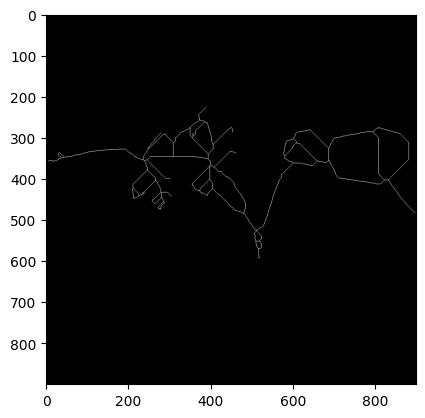

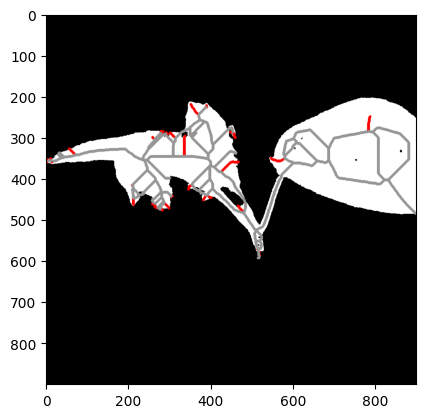

In [54]:
pruned_skel, seg_img, edge_objects = pcv.morphology.prune(skel_img=skeleton, size=100, mask=mask_fill)

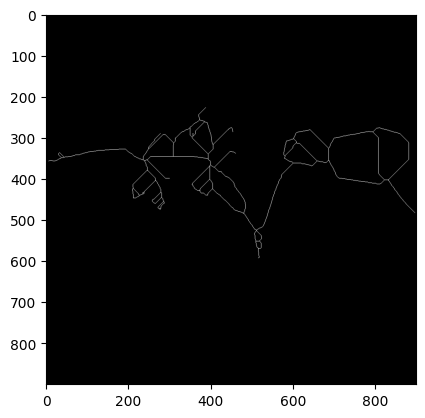

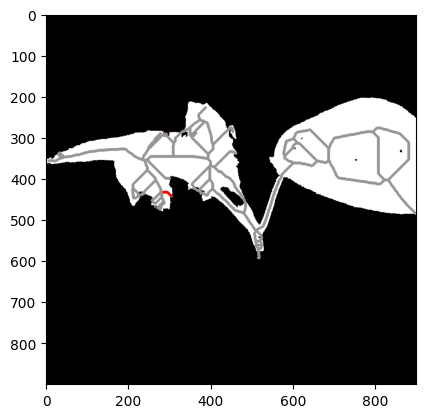

In [55]:
pruned_skel, seg_img, edge_objects = pcv.morphology.prune(skel_img=pruned_skel, size=50, mask=mask_fill)

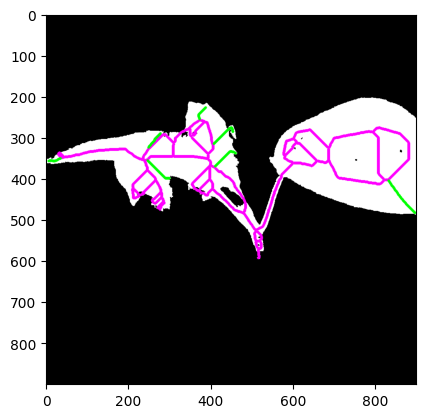

In [56]:
leaf_obj, stem_obj= pcv.morphology.segment_sort(skel_img=pruned_skel, objects=edge_objects, mask=mask_fill)

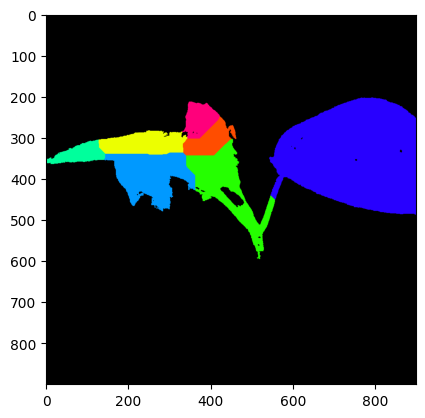

In [57]:
filled_img = pcv.morphology.fill_segments(mask=mask_fill, objects=leaf_obj, label="default")

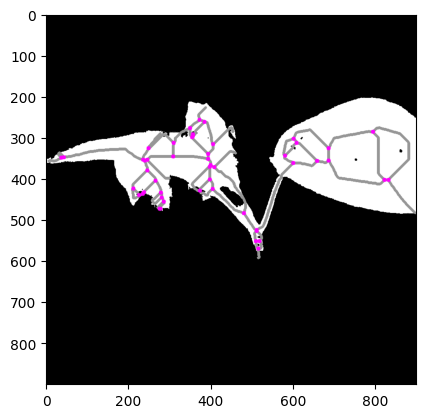

In [58]:
branch_pts_mask = pcv.morphology.find_branch_pts(skel_img=pruned_skel, mask=cropped_mask, label="default")

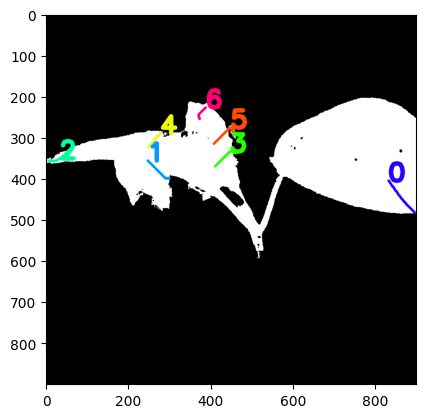

In [59]:
segmented_img, labeled_img = pcv.morphology.segment_id(skel_img=pruned_skel,
                                                       objects=leaf_obj,
                                                       mask=cropped_mask)

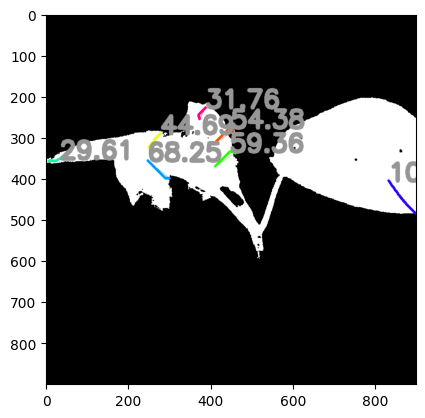

In [60]:
labeled_img = pcv.morphology.segment_euclidean_length(segmented_img=segmented_img, 
                                                      objects=leaf_obj, label="default")

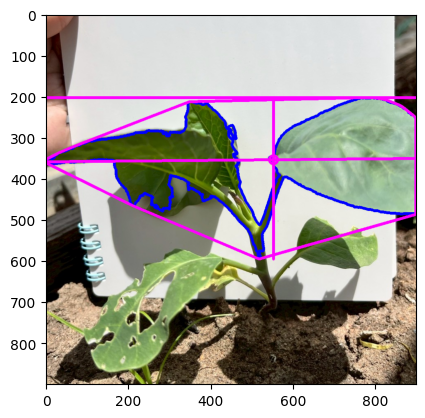

In [61]:
shape_img = pcv.analyze.size(img=cropped_img, labeled_mask=mask_fill, label="default")